# Exec client side demonstration using Python

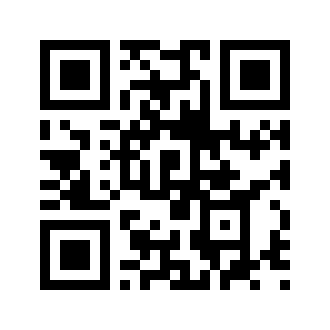

In [4]:
# will be used to generate new trackable URLs
import qrcode
img = qrcode.make('https://pypi.org/')
img

First touch with the server, 
It creates a new author
It creates a session


In [2]:
import requests, pickle

def init_session():
    headers = {
    }

    global_session = requests.session()
    # touch the server
    global_session.get('http://localhost:3000/', headers=headers)

    with open('somefile', 'wb') as f:
        pickle.dump(global_session.cookies, f)

    global_session = requests.session()  # or an existing session

    with open('somefile', 'rb') as f:
        global_session.cookies.update(pickle.load(f))
    
    return global_session
    

global_session = init_session()
# data0 = {
#   'title': 'JavaScript function 2',
#   'summary': 'Find a prime number',
#   'genre': 'Running',
#   "expect":"json"
# }
# sessions = {};
# def input_(msg):
#     return input(msg)
    
# sessions.update({input("Enter a new session name: "):global_session.post('http://localhost:3000/exec/session/create', headers=headers, data=data0)})

# data1 = {
#   'title': 'JavaScript function 3',
#   'summary': 'Regression function',
#   'genre': 'Running',
#   "expect":"json"
# }
# sessions.update({input("Enter a new session name: "):global_session.post('http://localhost:3000/exec/session/create', headers=headers, data=data0)})


In [4]:
def restricted_input(msg, options):
    while True:
        try:
            v = str(input(msg))
            if v not in options:
                raise ValueError #this will send it to the print message and back to the input option
            return v
        except ValueError:
            print("Invalid entry")
restricted_input("choose between y/n", ["y","n"])

import enum
class Genre(enum.Enum):
    Running = 1
    Passive = 2
    ExecCrushed = 3
    ExecutionCrushed =4
def input_dictionary(dic):
    res = {}
    for k in dic:
        val = input('Enter your '+k+' of type: '+str(dic[k]['type'])+' :')
        if(dic[k]['type']== Genre):
            check = None
            while(check is None):
                try:
                    check = Genre[val]
                except KeyError:
                    print("Oops!  This is not in "+str([e.name for e in Genre])+".  Try again...")
                    val = input('re-enter your '+k+' of type: '+str(dic[k]['type'])+' :')
                    pass
        res[k] = val if val else dic[k]['default'] if ('default' in dic[k]) else ""
    return res

input_dictionary({
  'title': {'type':str},
  'summary': {'type':str},
  'genre': {'type':Genre},
  "expect": {'type':str, 'default':'json'}
})

# input_dictionary({
#   'imprint': {'type':str},
#   'due_back': {'type':str},
#   'status': {'type':Genre},
#   "expect": {'type':str, 'default':'json'}
# })

Enter your title of type: <class 'str'> :sess1
Enter your summary of type: <class 'str'> :summary
Enter your genre of type: <enum 'Genre'> :genra
Oops!  This is not in ['Running', 'Passive', 'ExecCrushed', 'ExecutionCrushed'].  Try again...
re-enter your genre of type: <enum 'Genre'> :Passive
Enter your expect of type: <class 'str'> :json


{'title': 'sess1', 'summary': 'summary', 'genre': 'Passive', 'expect': 'json'}

In [8]:
from requests import Timeout
sessions = {};

print('Define a list of sessions')
schema = {
  'title': {'type':str},
  'summary': {'type':str},
  'genre': {'type':Genre},
  "expect": {'type':str, 'default':'json'}
}
def input_sessions(msg, schema):
    session_names=[]
    while True:
        val = input(msg)
        if(val in session_names):
            redefine = restricted_input("This session is already defined, do you want to re-define (y/n)", ["y","n"])
            if(redefine=="n"):
                continue
            
        if(not val):
            break
        session_names.append(val)
        yield {'name':val, 'data':input_dictionary(schema)}
for sess in input_sessions("enter a new session name (or backspace to finish)", schema):
    try:
        print(sess)
        sessions.update({sess['name'] : global_session.post('http://localhost:3000/exec/session/create', data=sess['data'], timeout=3)})
    except Timeout:
        print('The request timed out. Please try again:')
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        print (e)
    else:
        print('The request succeeded')

Define a list of sessions
enter a new session name (or backspace to finish)Session1
Enter your title of type: <class 'str'> :Title1
Enter your summary of type: <class 'str'> :Summery1
Enter your genre of type: <enum 'Genre'> :Passive
Enter your expect of type: <class 'str'> :json
{'name': 'Session1', 'data': {'title': 'Title1', 'summary': 'Summery1', 'genre': 'Passive', 'expect': 'json'}}
The request succeeded
enter a new session name (or backspace to finish)Session2
Enter your title of type: <class 'str'> :Title2
Enter your summary of type: <class 'str'> :Summary2
Enter your genre of type: <enum 'Genre'> :Passive
Enter your expect of type: <class 'str'> :json
{'name': 'Session2', 'data': {'title': 'Title2', 'summary': 'Summary2', 'genre': 'Passive', 'expect': 'json'}}
The request succeeded
enter a new session name (or backspace to finish)


In [43]:
import json
import timeit

def track(session, function):
    content = json.loads(session.text)
    sess_id = content["_id"]
    sess_author = content["author"]
    cookies = {
      }

    headers = {
        'Connection': 'keep-alive',
        'Cache-Control': 'max-age=0',
        'Origin': 'http://localhost:3000',
        'Upgrade-Insecure-Requests': '1',
        'Content-Type': 'application/x-www-form-urlencoded',
        'Sec-Fetch-User': '?1',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Sec-Fetch-Site': 'same-origin',
        'Sec-Fetch-Mode': 'navigate',
        'Referer': 'http://localhost:3000/exec/execution/create',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
    }
    start = time.time()
    result = function()
    end = time.time()
    print("Execution time: "+str(end - start))
    data = {
      'session': sess_id,
      'imprint': str(result),
      'due_back': '',
      'status': 'Passive'
    }

    response3 = global_session.post('http://localhost:3000/exec/execution/create', headers=headers, cookies=cookies, data=data)
    print(response3.text)
    
def function():
    import time
    time.sleep(3)
    return {"balbal":"blablablabla"}

track(sessions['Session2'], function)

Execution time: 3.0030784606933594
{"status":"Passive","_id":"5e0c5ffc22376d0a06586147","session":"5e0c5b1f22376d0a06586146","imprint":"{&#x27;balbal&#x27;: &#x27;blablablabla&#x27;}","due_back":null,"__v":0}


List sessions attached to the current user

In [5]:
import requests
def list_sessions(global_session):
    cookies = {
    }

    headers = {
        'Connection': 'keep-alive',
        'Cache-Control': 'max-age=0',
        'Upgrade-Insecure-Requests': '1',
        'Sec-Fetch-User': '?1',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Sec-Fetch-Site': 'same-origin',
        'Sec-Fetch-Mode': 'navigate',
        'Referer': 'http://localhost:3000/exec',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
        'If-None-Match': 'W/"4ca-rqBSLx58JlPJOwoweND7UQb7C+w"',
    }

    response_ = global_session.get('http://localhost:3000/exec/sessions', headers=headers, cookies=cookies)
    return response_.text

Get session details

In [14]:
import requests

def session_details(session, global_session):
    cookies = {

    }

    headers = {
        'Connection': 'keep-alive',
        'Cache-Control': 'max-age=0',
        'Upgrade-Insecure-Requests': '1',
        'Sec-Fetch-User': '?1',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Sec-Fetch-Site': 'none',
        'Sec-Fetch-Mode': 'navigate',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
        'If-None-Match': 'W/"67e-2DVwiNoPIygAiD0xqn/uYtuf7i8"',
    }

    response2 = global_session.get('http://localhost:3000/exec/session/'+'5e08f4998ed36d276c133671', headers=headers, cookies=cookies)
    return response2.text

'{"title":"Title","session":{"genre":[],"_id":"5e08f4998ed36d276c133671","title":"title","author":{"_id":"5e08f475e27148270405d5f6","uid":"7cd284a0-2a6b-11ea-a7a4-fde13b9f4fb6","date_of_birth":"2019-12-29T18:46:13.226Z","date_of_death":"2020-01-12T18:46:13.226Z","__v":0},"summary":"summary","__v":0},"session_executions":[{"status":"Passive","_id":"5e08f4ad8ed36d276c133672","session":"5e08f4998ed36d276c133671","imprint":"nothing","due_back":null,"__v":0}]}'

Create an execution for some session

In [12]:
import requests

cookies = {
    }

headers = {
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Origin': 'http://localhost:3000',
    'Upgrade-Insecure-Requests': '1',
    'Content-Type': 'application/x-www-form-urlencoded',
    'Sec-Fetch-User': '?1',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'navigate',
    'Referer': 'http://localhost:3000/exec/execution/create',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
}

data = {
  'session': '5e08e4c53ae93710dff3262e',
  'imprint': 'nothing',
  'due_back': '',
  'status': 'Passive'
}

response3 = global_session.post('http://localhost:3000/exec/execution/create', headers=headers, cookies=cookies, data=data)
response3.text

'{"status":"Passive","_id":"5e08ee8c634f861f2e6faecb","session":"5e08e4c53ae93710dff3262e","imprint":"nothing","due_back":null,"__v":0}'

In [45]:
import requests

cookies = {
    }

headers = {
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-User': '?1',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Sec-Fetch-Site': 'cross-site',
    'Sec-Fetch-Mode': 'navigate',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
    'If-None-Match': 'W/"11f-GrbDuZ6yV7aa+BCBBelvoyrXRJU"',
}

response = global_session.get('http://localhost:3000/exec/executions', headers=headers, cookies=cookies)
response.text

'{"title":"Session execution List","execution_list":[{"status":"Passive","_id":"5e0c5ffc22376d0a06586147","session":{"genre":["5e0c5aeb78ccbbde5f5b84a4"],"_id":"5e0c5b1f22376d0a06586146","title":"Title2","author":"5e0c596122376d0a06586144","summary":"Summary2","__v":0},"imprint":"{&#x27;balbal&#x27;: &#x27;blablablabla&#x27;}","due_back":null,"__v":0}]}'